In [220]:
from model.poisson_vhmm import PoissonVHMM
import jax
from numpy.random import gamma, poisson
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
### generate test data

cluster_num = 2
batch = 100
time = 100

pi_dirichlet = 5. * np.ones(cluster_num)
A_dirichlet = 10. * np.eye(cluster_num) + 1.0 * np.ones((cluster_num, cluster_num))

pi = np.random.dirichlet(pi_dirichlet)
A = np.array([np.random.dirichlet(A_dirichlet[i]) for i in range(cluster_num)])

lam_gamma_a = 3.
lam_gamma_b = 0.01

lam = np.random.gamma(lam_gamma_a, 1/lam_gamma_b, size=cluster_num)

state = np.zeros((time, batch), dtype=np.int16)
for i in range(time):
    if i == 0:
        state[0] = np.random.multinomial(n=1, pvals=pi, size=state[0].shape).argmax(-1)
    else:
        for b in range(batch):
            state[i][b] = np.random.multinomial(n=1, pvals=A[state[i-1][b]], size=1).argmax(-1)

obs = np.zeros((time, batch))
for i in range(time):
    for b in range(batch):
        obs[i][b] = np.random.poisson(lam[state[i][b]])


In [214]:
print(A)
print(pi)

[[0.88445986 0.11554014]
 [0.00844778 0.99155222]]
[0.45222933 0.54777067]


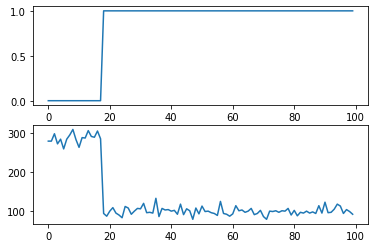

In [221]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(state[:, 0])
plt.subplot(2, 1, 2)
plt.plot(obs[:, 0])


-81069.97
-17849.918
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125
-17888.125


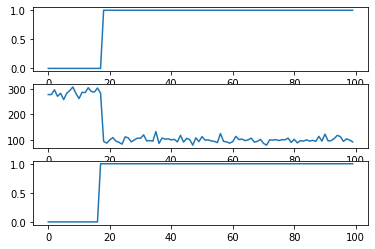

In [222]:
import jax.numpy as jnp
cluster_num = 2
model = PoissonVHMM(cluster_num,
                    init_state_prior=jnp.array([10., 10.]),
                    transition_prior=100.*jnp.eye(cluster_num) +  1.0 * jnp.ones((cluster_num, cluster_num)),
                    poisson_prior=np.array([3., 0.01]))

gamma, viterbi, elbo = model.fit(jnp.array(obs))

plt.subplot(3, 1, 1)
plt.plot(state[:, 0])
plt.subplot(3, 1, 2)
plt.plot(obs[:, 0])
plt.subplot(3, 1, 3)
plt.plot(viterbi[:, 0])

[3.0333734 3.3037102 3.370707 ]
-85952.08
-31117.682
-31172.29
-31171.422
-31170.744
-31169.523
-31169.105
-31168.32
-31167.758
-31167.217
-31166.871
-31166.326
-31165.91
-31165.387
-31165.062
-31164.95
-31164.625
-31164.344
-31163.783
-31163.836
-31163.652
-31163.652
-31163.14
-31163.238
-31163.074
-31162.64
-31162.734
-31162.77
-31162.607
-31162.543
-31162.555
-31162.402
-31162.326
-31162.084
-31162.281
-31162.312
-31162.188
-31162.04
-31161.926
-31161.902
-31161.889
-31162.008
-31161.82
-31161.746
-31161.727
-31161.896
-31161.91
-31161.562
-31161.844
-31161.59
-31161.855
-31161.61
-31161.46
-31161.668
-31161.854
-31161.848
-31161.61
-31161.441
-31161.691
-31161.652
-31161.682
-31161.715
-31161.543
-31161.652
-31161.824
-31161.793
-31161.613
-31161.613
-31161.703
-31161.773
-31161.596
-31161.445
-31161.777
-31161.564
-31161.525
-31161.676
-31161.557
-31161.71
-31161.535
-31161.7
-31161.426
-31161.73
-31161.637
-31161.422
-31161.594
-31161.492
-31161.55
-31161.568
-31161.492
-31161.60

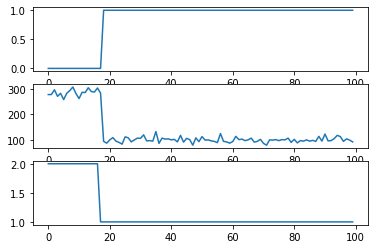

In [223]:
import jax.numpy as jnp
cluster_num = 3
model = PoissonVHMM(cluster_num,
                    init_state_prior=10.*jnp.ones(cluster_num),
                    transition_prior=100.*jnp.eye(cluster_num) +  1.0 * np.ones((cluster_num, cluster_num)),
                    poisson_prior=jnp.array([3., 0.01]))
print(model.poisson_posterior_a)
gamma, viterbi, elbo = model.fit(jnp.array(obs))

plt.subplot(3, 1, 1)
plt.plot(state[:, 0])
plt.subplot(3, 1, 2)
plt.plot(obs[:, 0])
plt.subplot(3, 1, 3)
plt.plot(viterbi[:, 0])


In [183]:
print(obs.shape)

(100, 100)
